In [59]:
import pandas as pd
import matplotlib.pyplot as plt


In [60]:
seattle = pd.read_csv('../data/seattle_rain.csv', parse_dates=['DATE'])
stl = pd.read_csv('../data/stl_rain.csv', parse_dates=['DATE'])
nyc = pd.read_csv('../data/nyc_rain_4132986.csv', parse_dates=['DATE'])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16020\575010284.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  seattle = pd.read_csv('../data/seattle_rain.csv', parse_dates=['DATE'])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16020\578010612.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s = seattle.set_index('DATE')['PRCP'].resample('M').sum()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16020\578010612.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  t = stl.set_index('DATE')['PRCP'].resample('M').sum()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16020\578010612.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  n = nyc.set_index('DATE')['PRCP'].resample('M').sum()


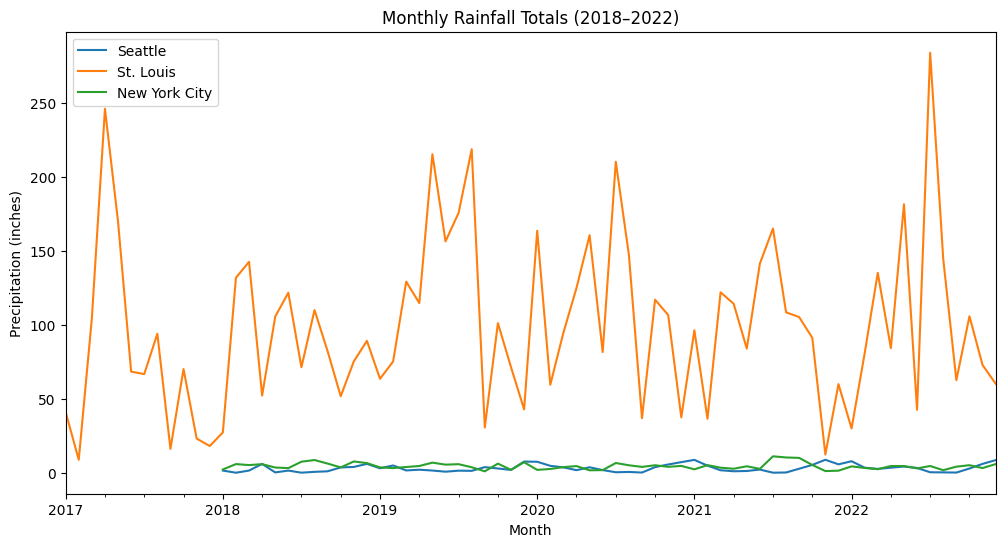

In [61]:
s = seattle.set_index('DATE')['PRCP'].resample('M').sum()
t = stl.set_index('DATE')['PRCP'].resample('M').sum()
n = nyc.set_index('DATE')['PRCP'].resample('M').sum()

ax = s.plot(figsize=(12,6), label='Seattle')
t.plot(ax=ax, label='St. Louis')
n.plot(ax=ax, label='New York City')
ax.set_title('Monthly Rainfall Totals (2018–2022)')
ax.set_xlabel('Month'); ax.set_ylabel('Precipitation (inches)')
ax.legend()
